# SymPy

## Useful information

[PyPl](https://pypi.org/project/sympy/)  
[Website](https://www.sympy.org/en/index.html)  
[Documentation](https://docs.sympy.org/latest/index.html)  
[Tutorial](https://docs.sympy.org/latest/tutorial/index.html)  
[Cheatsheet](http://daabzlatex.s3.amazonaws.com/9065616cce623384fe5394eddfea4c52.pdf)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Sympy_logo.svg/1200px-Sympy_logo.svg.png" width=200 height=200/>

## Table of Contents

* [Introduction](#introduction)
  * [Basics](#basics)
    + [Symbols](#symbols)
  * [Operations](#operations)
    + [Substitutions](#substitutions)
    + [Evaluations](#evaluations)
  * [Geometry](#geometry)
  * [Calculus](#calculus)
    + [Derivative](#derivative)
    + [Integration](#integration)
    + [Limits](#limits)
  * [Solvers](#solvers)
    + [Equations](#equations)
    + [Solving Algebraic Equations](#solving-algebraic-equations)
    + [Solving Differential Equations](#solving-differential-equations)
    + [Exercises](#exercises)
  * [Challenge](#challenge)

## Introduction

SymPy is an open source computer algebra system Python library for symbolic mathematics.

To start using it, just import in Python, for example, like this.

In [1]:
from sympy import *

## Basics

### Symbols

 `Symbol` is the most important class in SymPy library. Symbolic computations are done with symbols. SymPy variables are objects of `Symbols` class.

To define a SymPy symbol, we can simply invoke its constructor with the respective variable's name.

In [2]:
a = Symbol('a') 

An easier way to define multiple symbols at once is unsing `symbols` method, which takes a string of variable names separated by spaces or commas, and creates `Symbols` out of them.

## Operations

### Substitutions

One of the most common things you might want to do with a mathematical expression is substitution. Substitution replaces all instances of something in an expression with something else. It is done using the `subs` method.

In [52]:
expr = cos(x) + 1
expr.subs(x, y)

cos(y) + 1

We may also evaluate expressions at certain points

In [53]:
expr.subs(x, 0)

2

### Evaluations

To evaluate a numerical expression into a floating point number, the `evalf` method is used.

In [58]:
expr = sqrt(8)
expr.evalf(10)

2.828427125

## Geometry

The geometry module for SymPy allows one to create two-dimensional geometrical entities, such as lines and circles, and query for information about these entities.

The following entities are currently available in the geometry module:

- `Point`
- `Line`, `Segment`, `Ray`
- `Ellipse`, `Circle`
- `Polygon`, `RegularPolygon`, `Triangle`


In [60]:
from sympy.geometry import *

In [63]:
x = Point(0, 0)
y = Point(1, 1)
z = Point(2, 2)
zp = Point(1, 0)

Point.is_collinear(x, y, z)

True

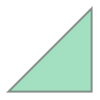

In [74]:
Triangle(zp, y, x)

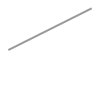

In [68]:
t.medians[x]

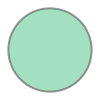

In [75]:
Circle(x, 5)

## Calculus

### Derivative

In [3]:
x, y, z = symbols('x y z')

In [4]:
diff(cos(x), x)

-sin(x)

`diff` can take multiple derivatives at once. To take multiple derivatives, pass the variable as many times as you wish to differentiate, or pass a number after the variable. 

In [5]:
diff(x**4, x, x, x)

24*x

In [6]:
diff(x**4, x, 3)

24*x

You can also take derivatives with respect to many variables at once. Just pass each derivative in order, using the same syntax as for single variable derivatives.

In [7]:
expr = exp(x*y*z)
expr

exp(x*y*z)

In [8]:
diff(expr, x, y, z)

(x**2*y**2*z**2 + 3*x*y*z + 1)*exp(x*y*z)

To create an unevaluated derivative, use the `Derivative` class, which has the same syntax as `diff`.

In [9]:
deriv = Derivative(expr, x, y, z)
deriv

Derivative(exp(x*y*z), x, y, z)

To evaluate an unevaluated derivative, use the `doit` method.

In [10]:
deriv.doit()

(x**2*y**2*z**2 + 3*x*y*z + 1)*exp(x*y*z)

### Integration

To compute an integral, the `integrate` function is used.

There are two kinds of integrals, definite and indefinite. To compute an indefinite integral, that is, an antiderivative, or primitive, just pass the variable after the expression.

In [11]:
expr = x ** 2 + x + 1 
expr

x**2 + x + 1

In [12]:
integrate(expr, x)

x**3/3 + x**2/2 + x

**Note**: SymPy does not include the constant of integration. If you want it, you can add one yourself

To compute a definite integral, pass the argument `(integration_variable, lower_limit, upper_limit)`.

Here we are computing the famous [Dirichlet integral](https://en.wikipedia.org/wiki/Dirichlet_integral).

In [13]:
integrate(sin(x)/x, (x, 0, oo))

pi/2

As with indefinite integrals, you can pass multiple limit tuples or variables to perform a multiple integral.

In [14]:
expr = exp(-x**2 - y**2)
inte = Integral(expr, (x, -oo, oo), (y, -oo, oo))
inte

Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [15]:
inte.doit()

pi

### Limits


To compute a limit, the `limit` function is used.

In [16]:
limit(1/x, x, oo)

0

`limit` should be used instead of regular substition (trough `subs`), whenever the point of evaluation is a singularity. 

Even though SymPy has objects to represent ∞, using them for evaluation is not reliable because they do not keep track of things like rate of growth. Also, things like ∞−∞ and ∞∞ return nan (not-a-number), since they represent indeterminate forms.

In [17]:
expr = x/exp(x)
expr.subs(x, oo)

nan

To evaluate a limit at one side only, pass `+` or `-` as a fourth argument to limit.

In [18]:
lim = Limit(1/x, x, 0, '+')
lim

Limit(1/x, x, 0)

In [19]:
lim.doit()

oo

In [20]:
lim = Limit(1/x, x, 0, '-')
lim

Limit(1/x, x, 0, dir='-')

In [21]:
lim.doit()

-oo

## Solvers

### Equations

Before we start solving equations, we must have a way to represent equations.

To represent the equality `x = y`, we can't just write it like that, because that would a Python variable assignment.

Neither can we use the double equals operator, since that would compare the value of the varaibles, not their symbolic meaning.

In [22]:
x == y

False

That being said, SymPy provides an `Eq` class to represent these types of equations.

In [23]:
Eq(x, y)

Eq(x, y)

### Solving Algebraic Equations

The main function for solving algebraic equations is `solveset`. The syntax for it is `solveset(equation, variable=None, domain=S.Complexes)`

Equations may be in the form of `Eq` instances or expressions that are assumed to be equal to zero.

There is another function called `solve` which can also be used to solve equations. The syntax is `solve(equations, variables)`.

In [24]:
solveset(x**2 - x, x)

FiniteSet(0, 1)

In [37]:
solveset(x - x, x, domain=S.Reals)

Reals

In [39]:
solveset(sin(x) - 1, x)

ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers)

In [40]:
solve(sin(x) - 1, x)

[pi/2]

As you can notice, `solveset` and `solve` return different results for the same equation. That's because they used different methods to solving. 

`solveset` uses algebraic methods, whereas `solve` uses numerical methods, so it's always advised to use `solveset` when possible.

Similar to `solveset`, `linsolve` and `nonlinsolve` might be used to solve linear and non-linear equation systems, respectively.

In [42]:
linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

FiniteSet((-y - 1, y, 2))

In [49]:
nonlinsolve([x * 2 - y, y ** 2 - x], x, y)

FiniteSet((0, 0), (1/4, 1/2))

### Solving Differential Equations

To solve differential equations, use dsolve. First, create an undefined function by passing `cls=Function` to the symbols function.

In [25]:
f, g = symbols('f g', cls=Function)

`f` and `g` are now undefined functions. We can call f(x), and it will represent an unknown function.

In [26]:
diffeq = Eq(f(x).diff(x, x) - 2 * f(x).diff(x) + f(x), sin(x))
diffeq

Eq(f(x) - 2*Derivative(f(x), x) + Derivative(f(x), (x, 2)), sin(x))

In [27]:
dsolve(diffeq)

Eq(f(x), (C1 + C2*x)*exp(x) + cos(x)/2)

### Exercises

These are some exercises we propose for you to practice your SymPy's library syntax. Almost all of them can be done using ony one line.

You can find the correspondent solutions [here](Solutions.ipynb).

1. Find 100 digits of $\pi^{e}$
2. Expand $(x + y)^{2}(x - y)(x^{2} + y)$
3. Simplify $\frac{1}{x} + \frac{x sin(x) - 1}{x^{2} - 1}$
4. Find roots of $x^{4} - 4x^{3} + 2x^{2} - x = 0$
5. Solve the following equation system $x + y = 4$ and $x \cdot y = 3$
7. Calculate the definite integral of the function $cos^{3}{x}$ between 0 and $\frac{\pi}{2}$
8. Calculate the definite integral of the function $cos^{3}{x}$ between 1 and ∞
9. Solve the differential equation $f''(x) + 9f(x) = 1$

## Challenge

1. Suppose you have the function `f(x) = x ** 3 - 2` and a circle placed in coordinates `(0, 3)` with radius 5.
2. Integrate the function between the two points where it intersects the circle
3. Replace *n* in the following ODE `f''(x) + f(x) - 1`  by the value you obtained in the last step.
4. Solve the EDO.
5. Evaluate its value at `x = 4` to 10 decimal places.